In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import numpy as np


# Load the dataset
df = pd.read_csv('soil_data_final.csv', dtype={3: str})

# Modifying the Data
columns_to_convert = ['sandtotal_r', 'silttotal_r', 'claytotal_r', 'om_r', 'ksat_r']

for column in columns_to_convert:
    df[column] = pd.to_numeric(df[column], errors='coerce')

    
# Print Number of Rows
print("Number of rows in df before subsetting:", df.shape[0])


num_rows_condition = df[df['ksat_r'] <= 150].shape[0]

# Calculate the total number of rows in the dataset
total_rows = df.shape[0]

# Calculate the percentage
percentage = (num_rows_condition / total_rows) * 100

print(percentage)

# Outlier
Q1 = df['ksat_r'].quantile(0.25)
Q3 = df['ksat_r'].quantile(0.75)

# Calculating IQR
IQR = Q3 - Q1

# Calculating the outlier cutoffs
lower_cutoff = Q1 - 1.5 * IQR
upper_cutoff = Q3 + 1.5 * IQR

print(upper_cutoff)
    
# Getting Rid of Outliers
df = df[df['ksat_r'] <= 100]

# Print Number of Rows
print("Number of rows in df after subsetting:", df.shape[0])
    
# Selecting predictors and target variable
X = df[['sandtotal_r', 'silttotal_r', 'claytotal_r', 'om_r']]
y = df['ksat_r']

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train.replace([np.inf, -np.inf], np.nan).fillna(0)
y_train = y_train.replace([np.inf, -np.inf], np.nan).fillna(0)
X_test = X_test.replace([np.inf, -np.inf], np.nan).fillna(0)
y_test = y_test.replace([np.inf, -np.inf], np.nan).fillna(0)

# Initialize XGBoost random forest model
model = xgb.XGBRFRegressor(objective ='reg:squarederror', colsample_bynode=0.8,
                           learning_rate=1, max_depth=5, n_estimators=100, subsample=0.8, random_state=42)

# Fit the model
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# print(predictions)
# print(y_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)

print(f'RMSE: {rmse}')


Number of rows in df before subsetting: 3161842
97.57147890375293
65.5
Number of rows in df after subsetting: 3060856
RMSE: 12.418028093172738


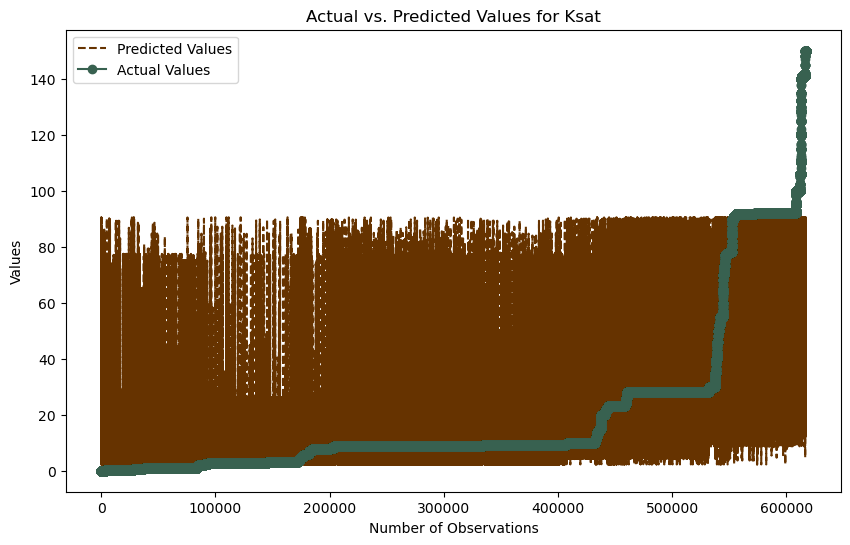

In [13]:
import matplotlib.pyplot as plt

# Convert y_test to a numpy array for consistency, if it's not already one
y_test_array = np.array(y_test)  # Replace with y_test.to_numpy() if y_test is a pandas Series

# Sorting the true values and predictions for a more interpretable plot
sorted_indices = np.argsort(y_test_array)
sorted_y_test = y_test_array[sorted_indices]
sorted_predictions = predictions[sorted_indices]

plt.figure(figsize=(10, 6))
plt.plot(sorted_predictions, label='Predicted Values', color='#663300', linestyle='--')
plt.plot(sorted_y_test, label='Actual Values', color='#386150', marker='o')
plt.title('Actual vs. Predicted Values for Ksat')
plt.xlabel('Number of Observations')
plt.ylabel('Values')
plt.legend()
plt.show()

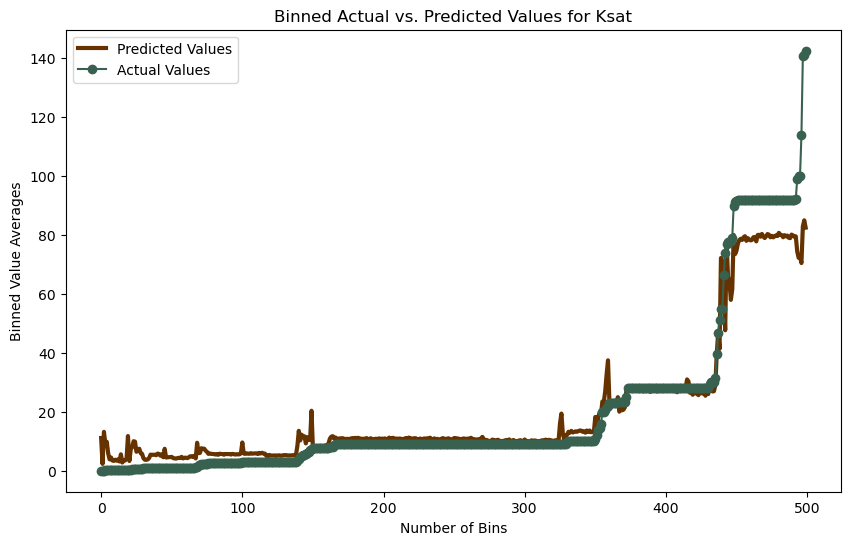

In [19]:
# Assuming sorted_y_test and sorted_predictions are already sorted and aligned
# Decide on the number of bins
num_bins = 500  # for example

# Function to calculate bin averages
def bin_averages(array, bins):
    bin_size = len(array) // bins
    binned_averages = [np.mean(array[i * bin_size:(i + 1) * bin_size]) for i in range(bins)]
    return np.array(binned_averages)

# Calculate bin averages for both actual and predicted values
binned_y_test = bin_averages(sorted_y_test, num_bins)
binned_predictions = bin_averages(sorted_predictions, num_bins)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(binned_predictions, label='Predicted Values', color='#663300', linestyle='-', linewidth=3)
plt.plot(binned_y_test, label='Actual Values', color='#386150', marker='o')
plt.title('Binned Actual vs. Predicted Values for Ksat')
plt.xlabel('Number of Bins')
plt.ylabel('Binned Value Averages')
plt.legend()
plt.show()